# Heavily Annotated Heatmaps in Seaborn

This notebook will give an example of how to extensively annotate a simple heatmap in Seaborn. A lot of it can be generalized to annotate other kinds of Seaborn plots as well.

I assume you know what a heatmap is and how to make a regular one. If not, check the [Seaborn heatmap documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Seaborn comes in with a nice annotate option in its heatmap function (see `annot` in the heatmap documentation). This allows you to use a different value than you have used for the coloring of the cell to annotate each cell.

But you can go much further than that when annotating your heatmap or any other chart. The basic idea is to add arbitrary text, plotting objects and shapes to the cells of the heatmap.

I will use the Istanbul traffic index data for the example (see [here](https://github.com/skurmus/2019istanbultrafikverisi) for an analyis of the data and related code (in Turkish).

## Data Prep

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# The dats is pickled and ready (to avoid setting up categories etc again froma csv)
df = pd.read_pickle("traffic_data.pkl")

The data consists of one row for each day. Each row has a month value (categorical) and day of the month value along with three boolean variables that indicate whether that day is a kind of holiday/vacation day and two numerical values that indicate the max and mean traffic index.

In [4]:
df.dtypes

month            category
dayofmonth          int64
bankholiday          bool
schoolholiday        bool
weekend              bool
mean              float64
max               float64
dtype: object

In [5]:
df

,month,dayofmonth,bankholiday,schoolholiday,weekend,mean,max
0,Jan,1,True,False,False,10.774306,31.0
1,Jan,2,False,False,False,24.268293,58.0
2,Jan,3,False,False,False,30.131944,69.0
3,Jan,4,False,False,False,28.055749,60.0
4,Jan,5,False,False,True,25.314685,51.0
...,...,...,...,...,...,...,...
360,Dec,27,False,False,False,36.940972,78.0
361,Dec,28,False,False,True,34.892361,65.0
362,Dec,29,False,False,True,21.236111,42.0
363,Dec,30,False,False,False,36.826389,71.0


We are going to make this data into kind of calendar format by pivoting it by `month`, `dayofmonth` and each of the values that we will use in the heatmap. So basically we are making calendar shaped tables that contain the different columns in our original data.

In [6]:
df_flat_mean = df.pivot("month", "dayofmonth", "mean")
df_flat_max = df.pivot("month", "dayofmonth", "max")
df_flat_bank = df.pivot("month", "dayofmonth", "bankholiday")
df_flat_school = df.pivot("month", "dayofmonth", "schoolholiday")
df_flat_weekend = df.pivot("month", "dayofmonth", "weekend")

This is how each of these dataframes looks like (just replace the floats with `True` and `False` values for the vacation data).

In [7]:
df_flat_mean

dayofmonth,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
Jan,10.774306,24.268293,30.131944,28.055749,25.314685,10.909408,28.524306,28.802083,26.797909,28.163763,...,26.076655,32.703833,13.045455,30.414634,24.578397,20.003472,24.679443,27.486111,27.045455,34.142857
Feb,32.993056,24.240418,16.034722,21.923345,25.409722,29.027875,34.288194,32.274648,22.857143,16.364583,...,26.428571,34.411150,23.409722,26.506993,26.232639,33.560976,25.208333,NaN,NaN,NaN
Mar,27.377622,21.302083,16.392982,23.667832,27.454545,29.397213,30.212544,30.630282,23.329861,19.795139,...,21.476190,NaN,NaN,NaN,NaN,29.886667,26.527972,28.989547,18.867133,4.689895
Apr,22.229965,24.411150,25.534965,26.843206,30.652632,28.052448,24.737762,25.062718,26.249123,27.849650,...,21.611888,15.937282,26.111498,26.874126,28.951049,25.583916,21.564460,24.951049,31.693380,NaN
May,14.164179,31.335664,30.667832,25.849650,15.799296,20.804196,23.860140,20.944056,20.566434,26.557491,...,32.213740,24.888502,30.122378,21.681818,13.445993,24.714286,25.909408,27.804196,30.306338,29.521127
Jun,20.434164,10.379791,7.655052,20.750877,19.775439,13.463158,8.972125,9.045296,7.797203,19.689895,...,30.245614,19.491228,29.118467,29.968421,28.620209,30.601476,30.510490,26.414634,19.121528,NaN
Jul,25.704861,24.378472,25.180556,26.239583,27.142361,22.225694,16.326316,24.565972,24.204861,24.736111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.598616,25.461806,...,22.819788,25.381944,28.066202,26.340351,27.552083,28.107639,25.486111,21.272085,25.478873,NaN


Not every month has 31 days. So there will be some cells at columns 29 to 31 with `NaN` values. Those will be problematic down the line. Just look at the weekend data for the last three days of February or last column for April. As expected, the values are `NaN` and not `False`.

In [36]:
df_flat_weekend.loc['Jan':'Apr', 15:]

dayofmonth,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,
Jan,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False
Feb,False,True,True,False,False,False,False,False,True,True,False,False,False,False,NaN,NaN,NaN
Mar,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,True
Apr,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,NaN


## The Coordinate and Offset System (and Matpoltlib Objects and Methods)

There are different ways of putting stuff on heatmaps, or actually on any chart. Before that, it would be good to understand the main parts of a [matpoltlib](https://matplotlib.org/) based chart (Seaborn is built on top of matplotlib).

First there is the `Figure`. That is the main canvas, the whole thing, what you display or export.

For a figure do be of any use, it needs to have something on it. That something is drawn on the `axes`. Each plot in the figure has its own axes (usually and x and a y axis but could have a z axis as well).

Axes by themselves are useless as well. You need to plot something on those axes to have a chart.

Usually, when you work with pandas or `matplotlib.pyplot` (usually abbreviated as `plt`) you just do the plot and matplotlib automatically creates the figure and axes. And then you have a current figure and current axes and you can just do things with them without really naming them. That confuses the hell out of me. So as I go along, I'll try to make things as explicit as I can.

There are different methods that allow you to put things other than a chart on a matpoltlib figure. The main ones I have used are:
- [`text`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.text.html?highlight=text#matplotlib.pyplot.text) allows you to put an arbitrary text anywhere you want on the axes.
- [`annotate`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.annotate.html?highlight=annotate#matplotlib.axes.Axes.annotate) does the same but you can make an annotation for a specific data point and then use an arrow to tie the annotation and the data point.
- [`plot`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot) allows you to draw lines and put markers on the chart.This is actually how you also make line and scatter graphs.
- [spans](https://matplotlib.org/3.1.0/api/axes_api.html#spans) allow you to draw lines and rectangles. In the below examples I am using the [`axspan`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.axhspan.html?highlight=axhspan#matplotlib.axes.Axes.axhspan).

When using these methods, you can specify where to put thing you want to put in different ways for each method. Some only work in data units, some with a lot more. Check the documentation to see which coordinate systems you can use with which mehod. I like working in data units so I'll be using those as much as possible.

The data coordinate system is easy to understand, it is the same as your data. So if you have a data point at (5, 5) and you want your annotation to appear right on that data point, those are the coordindates you use for your method of choice. Easy. But then you probably don't want that annotation to appear right on top of your data point, so you offset it by some value to put your annotation slightly to the right and above your data point for example.

A heatmap is the same. Each cell's coordinates are its column and row number (columns are on the X axis, rows are on the Y). If you add 1 to the X coordinate of a cell, you would be in the cell in the next column of the table. So all offsets should be smaller than 1 to stay in the same cell.

Below is a dummy heatmap. The X and Y axes are labeled with the coordinates of the each cell. The upper left cell's coordinats are (0, 0), the lower right cell's are (10, 10). It is an 11 by 11 heatmap. On each cell, I wrote a label with different offsets. The first number is the X offset, meaning how much to the right of the cell's main X coordinate is the label written, and the second number is the Y offset, how much further down from the cell's main Y coordinate is the label written. As you can see an offset of 0 and 0 puts the label to the outside top left of the cell.


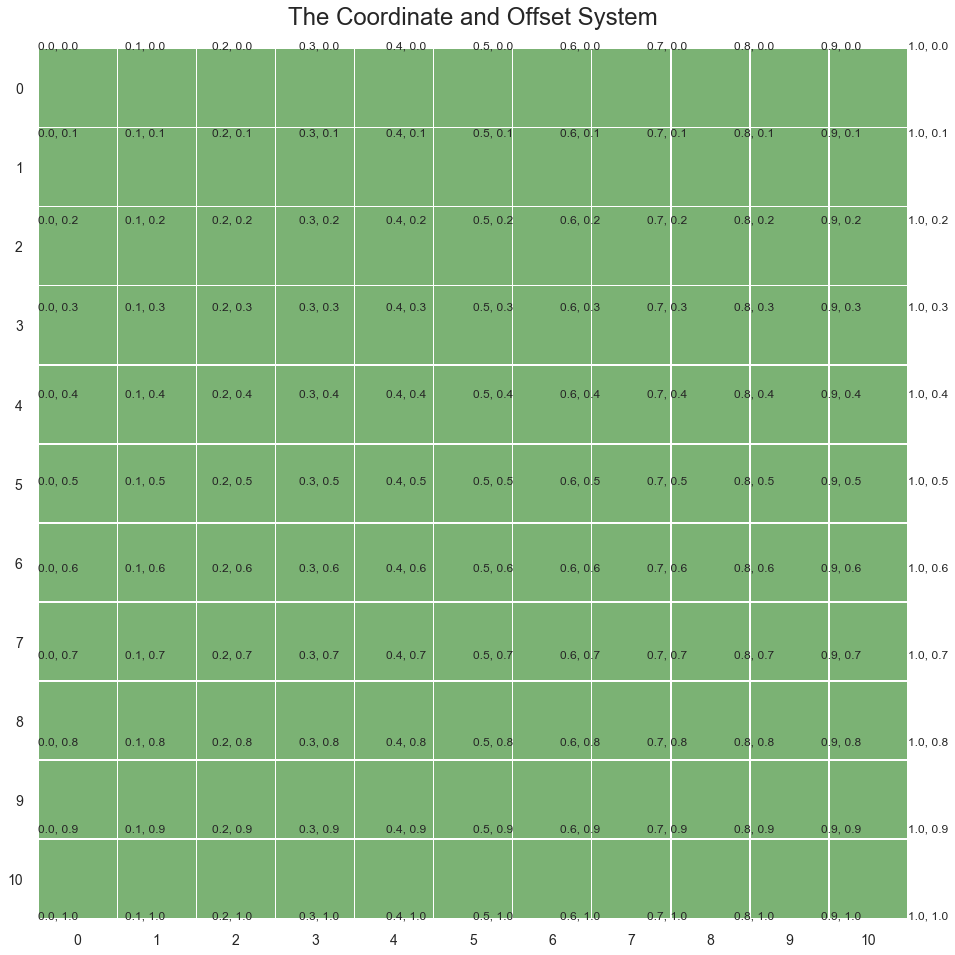

In [13]:
# The dummy heatmap to show the coordinates and offsets.
title = 'The Coordinate and Offset System'
sns.set(context='poster')
zeros = np.zeros(shape=(11,11)) # just an empty 2D array of zeros.
# We are making a subplot and assigning it to the axe ax and figure f.
# You can have more than one plot in a figure, here we are just making one.
f, ax = plt.subplots(figsize=(18, 16))
# Heatmap, don't worry abbout the parameters at this point, more on that, below.
# The only important thing to notice is that we are assigning this heatmap to the ax axes with the last parameter.
# So our heatmap is stored in ax now.
sns.heatmap(zeros, 
            linewidths=0.5,
            cmap=sns.xkcd_palette(["faded green"]),
            cbar=False,
            square=True, 
            ax=ax)
# To annotate
# zeros is a 2D numpy array, so we will iterate over it, first by row, getting each row
# then by column, getting each value. We are actually more interested in the row and column numbers
# in this example, so don't let that confuse you. The valur that we are getting is actually all zeros.
for rownumber, row in enumerate(zeros):
    for colnumber, value in enumerate(row):
        # For each column, we will use a slightly larger x offset.
        xoffset = colnumber/10
        # For each row, we will use a slightly larger y offset.
        yoffset = rownumber/10
        # We will then output the x and y offsets (f"{xoffset}, {yoffset}" part)
        # at the colnumber, row number coordinate offset by the offsets we defined above.
        # Just keep in mid: X axis goes with column numbers, Y axis with row numbers.
        # Note that we are annotating the axes.
        ax.annotate(f"{xoffset}, {yoffset}", ((colnumber + xoffset), (rownumber + yoffset)), fontsize=12)

# Some prettying up:)
# Change the tick parameters (there are too many ways of doing that, I found using the tick_params the most explicit).
# See the documentation at:
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14, labelrotation=0)
# Display a title and pad it with 24 points (this does not work in data units).
# Basically lifting the title by 24 extra points.
# Padding is given in points. That is not the same as pixels. It is complicated but think of it as similar to
# your font sizes. So if we are padding the title by 24 points and the title font size is 24 (which is also points btw)
# The we are lifting the title buy an amount equal to its line height.
# For a more detailed discussion see: https://stackoverflow.com/questions/6389914/pixels-vs-points-in-html-css
ax.set_title(title, fontsize=24, pad=24)

plt.show()

## The Real Heatmap
We are going to make a heatmap of the daily mean traffic. But we are going to annotate it heavily. Specifically, we will:
- Make the heatmap and color each cell with a color that reflects the traffic that day.
- Write that value as the main text for each cell.
- Write the max value on the upper left corner of each cell.
- Put a blue dot on the upper right corner of each cell if that day is on a weekend.
- Put a gold dot halfway up and to the righht of each cell if that day is a bank holiday.
- Add an orange translucent bar to the bottom of the cell if that day falls on a school vacation.
- Make a legend for some of these.
- Add a title.
- Add a couple of notes.

Our Heatmap Colors


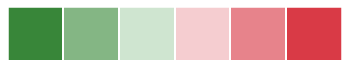

In [16]:
# This is the color palette we are going to use
print("Our Heatmap Colors")
sns.palplot(sns.diverging_palette(128, 10, s=75, l=50, center='light'))
plt.show()

# The code above just printed the colors, let's save them as well.
# Don't be fooled by the number of colors. We are defining this as a cmap so there are actually 256 colors.
# More on colormaps here: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
# and here https://seaborn.pydata.org/tutorial/color_palettes.html.
hm_pal = sns.diverging_palette(128, 10, s=75, l=50, center='light', as_cmap=True)

In [23]:
# We have four extra annotations in addition to the main value.
# Here we will add all the offsets and other information for those.

# We will write the max value to the upper right corner.
# X should be slightly offset so that it is not touching the left side of the cell.
# Y should be offset enough to clear the top of the text from the upper boundary of the cell.
MAX_XOFFSET = 0.05
MAX_YOFFSET = 0.3
MAX_FONTSIZE = 16

# We will put a blue circle on the upper right corner for weekend days
# You cannot really right adjust (probably you could with padding with spaces and string format actually)
# So we will start it at 0.8, at about 80% of the cell.
# The Y offset will be 0.2. Now the max above was 0.3, why is this 0.2?
# It looks better, you kind of have to play around with these values to get it the way you want.
# And of course the first one was an annotation, the second one is plotting a marker.
WEEKEND_XOFFSET = 0.8
WEEKEND_YOFFSET = 0.2
WEEKEND_COLOR = 'cornflowerblue'

# We will put a gold circle to the right and around the middle for bank holidays.
# The x offset is the same as the weekend circle. They will be aligned.
# We need the eyeball the y offset, something close to 0.5. =.6 works.
BANK_XOFFSET = 0.8
BANK_YOFFSET = 0.6
BANK_COLOR = 'gold'


# The axspan is more complicated. The format is:
# Axes.axhspan(self, ymin, ymax, xmin=0, xmax=1, **kwargs)
# The documentatipn says:
# Draw a horizontal span (rectangle) from ymin to ymax. With the default values of xmin = 0 and xmax = 1, 
# this always spans the xrange, regardless of the xlim settings, even if you change them, e.g., with the set_xlim() command. 
# That is, the horizontal extent is in axes coords: 0=left, 0.5=middle, 1.0=right but the y location is in data coordinates.
# So we will use the row numbers to place the span, then offset it to cover so that it takes up the right amount of space.
# Here it goes from rownumber + 0.85 to rownumber + 1.
# That is the lower 15% of the cell vertically.
SCHOOL_YOFFSET1 = 0.85
SCHOOL_YOFFSET2 = 1
# The xmin and max are trickier. These are in terms of percentages of the axis and not data.
# Fortuantely, it is easy to convert to a percentage of the axes by dividing 1 (100% of the axis)
# by max number of units (31 in our case).
# We will determine the horizontal span by multiplying the unit (1/31) by column number plus x offset.
# We want the horizontal span to start from the beginning of the column. The xmin in this case should be just 1/31 * Colnumber
# hence the first offset for x is 0.
# And we want it to end at the end of the column, we it would be 1/31 * (Colnumber + 1). So the second x offset is 1.
SCHOOL_XOFFSET1 = 0
SCHOOL_XOFFSET2 = 1
SCHOOL_UNIT = 1/31
SCHOOL_COLOR = 'orange'

In [29]:
df_flat_weekend.head()

dayofmonth,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
Jan,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
Feb,False,True,True,False,False,False,False,False,True,True,...,False,True,True,False,False,False,False,NaN,NaN,NaN
Mar,False,True,True,False,False,False,False,False,True,True,...,False,True,True,False,False,False,False,False,True,True
Apr,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,True,False,False,NaN
May,False,False,False,True,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


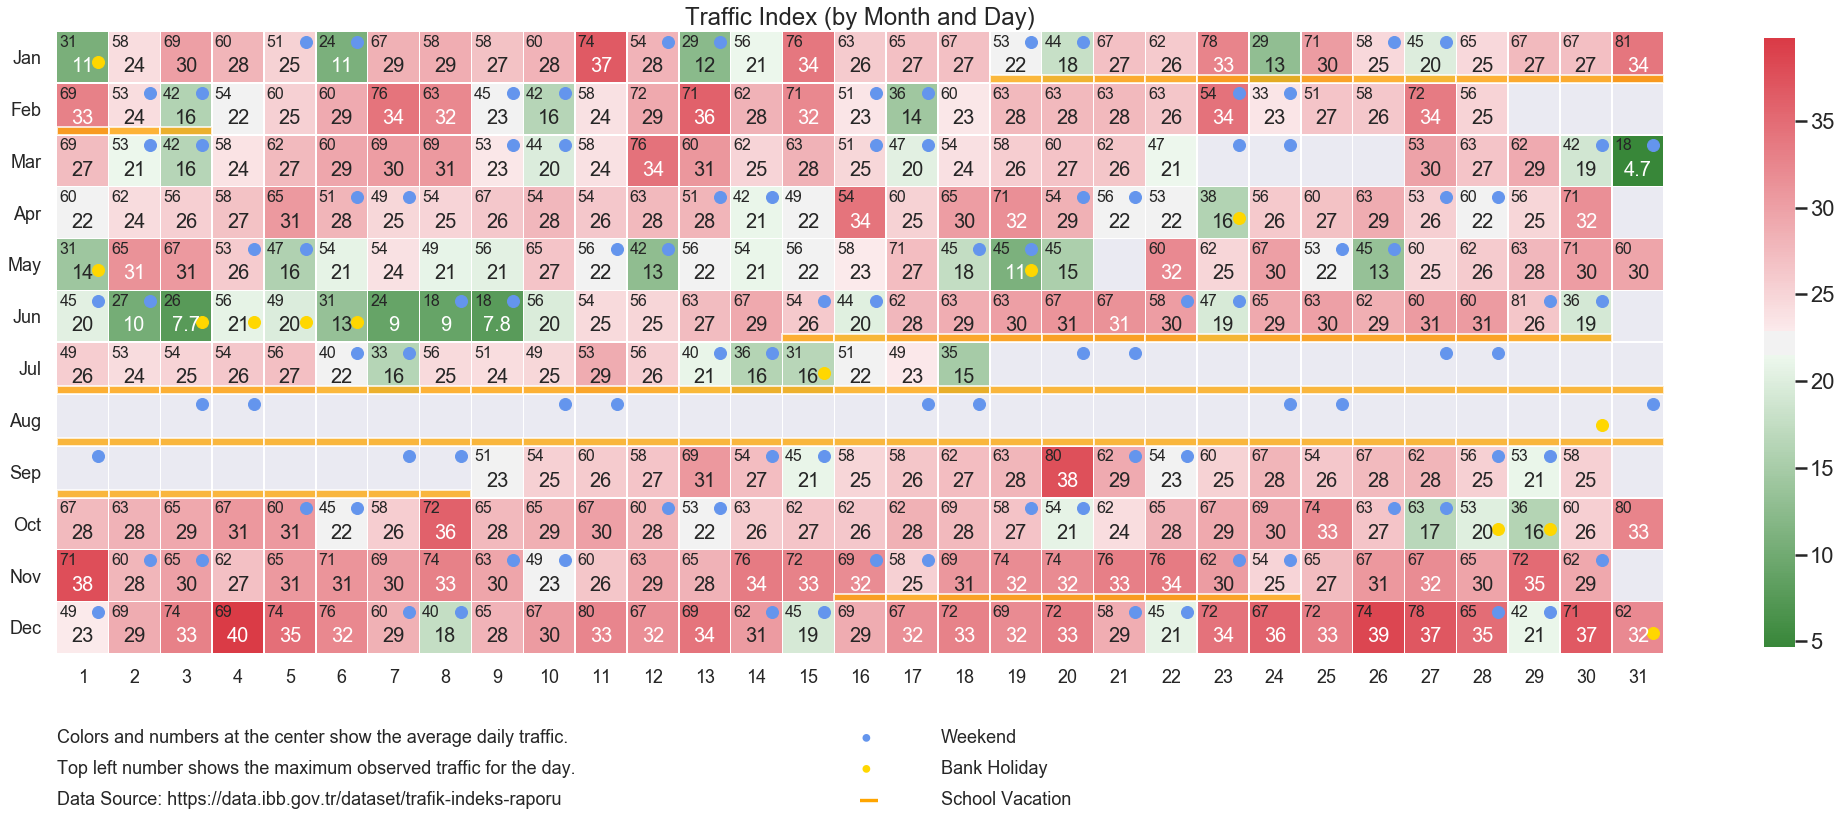

In [78]:
title = 'Traffic Index (by Month and Day)'
# The set context is a general prupopse setup for yuor figure. The poster context has
# larger labels and I use it by default.
# More on thah here: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(context='poster')
# We are making a subplot and assigning it to the axe ax and figure f.
# You can have more than one plot in a figure, here we are just making one.
# The fig size is the size of the figure in inches. Weird.
# The figıure size matters, because we are giving a lot of absolute values for font sizes
# and font sizes don't scale with the figure size. So try halving the figure size and see
# what happens to your beautiful heatmap.
f, ax = plt.subplots(figsize=(36, 32))
# Heatmap
sns.heatmap(
            # Data we are using for the heatmap
            df_flat_mean, 
            # Indicates that we want the value to be printed as well, the default annotation.
            annot=True, 
            # Annotations are just ax.text() objects and can use all the parameters for
            # for text objets as a key value dictionary. See the documentation for things you can change:
            # https://matplotlib.org/api/text_api.html#matplotlib.text.Text
            # Here we are just chnging the font size and the vertical alignement (with va)
            # Why top you might ask. Well it is weird, bottom makes it closer to the top:)
            annot_kws={"fontsize": 20, "va": "top"}, #top aslında aşağı doğru kaydırıyor.
            # Adjusting the width of the lines between cells
            linewidths=0.5, 
            # We have already amde a cmap for this, jsut resuing it.
            cmap=hm_pal, 
            # When square=True the cells are squares, by default, thet are rectangeles
            square=True, 
            # Whether to ouput the color bar. 
            cbar=True,
            # Similar to annot_kws. Here you can use all the parameters for a fig.colorbar.
            # See the documentation here:
            # https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.colorbar
            # There is no magic to 0.35. Find your value by traila and error.
            cbar_kws={"shrink": 0.35},
            # Fibally we are saying that this whole thing goes to the ax that we have created above.
            # It IS actually the ax btw. 
            # We could totally omit this. But then when we have more than one sublot, it will
            # make things hard to remember. So keep it here.
            ax=ax
           )
# Now to all the extra annotations
# The df_flat_max.values is just we need. It makes a 2D array out of our data frame.
# We iterate over that and grab one row at a time
for rownumber, row in enumerate(df_flat_max.values):
    # Then we iterate over the row to get each value.
    for colnumber, value in enumerate(row):
        # We do the max values for the upper left.
        # I don't want to output nan for rows with no value, so there is a check for that.
        if not (np.isnan(value)): 
            # The f"{d:.0f}" formats the vlaue to 2 decimal digits.
            # We have already set up the MAX_XOFFSET and MAX_YOFFSET above.
            ax.annotate(f"{value:.0f}", (colnumber + MAX_XOFFSET, rownumber + MAX_YOFFSET), fontsize=MAX_FONTSIZE)
        # Blue dot for the weekends.
        # The if statement looks weird, I know. It looks like it could just be
        # if df_flat_weekend.values[row][col]:
        # But np.nan is neither True nor False, so we have to explicityl comapre it to True.
        # Hence my rant towards the top somewhere.
        # The reason we are doing this check is that we do not want to make a calendar marking
        # for days that don't exist.
        if df_flat_weekend.values[rownumber][colnumber] == True:
            # This time rather thatn annotate, we are plotting a marker.
            # See the documentation for plot for other things you can do with it.
            # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html
            ax.plot(colnumber + WEEKEND_XOFFSET, rownumber + WEEKEND_YOFFSET, color=WEEKEND_COLOR, marker='o')
        # Gold dot for bank holidays. Jst like the weekend annotatipns above.
        if df_flat_bank.values[rownumber][colnumber] == True:
            ax.plot(colnumber + BANK_XOFFSET, rownumber + BANK_YOFFSET, color=BANK_COLOR, marker='o')
        # And the orange bar at the bottom for school vacations.
        if df_flat_school.values[rownumber][colnumber] == True:
            # See the above box with the explanation of the parameters and logic.
            ax.axhspan(ymin=rownumber + SCHOOL_YOFFSET1, 
                       ymax=rownumber + SCHOOL_YOFFSET2,
                       xmin=SCHOOL_UNIT * (colnumber + SCHOOL_XOFFSET1),
                       xmax=SCHOOL_UNIT * (colnumber + SCHOOL_XOFFSET2),
                       facecolor=SCHOOL_COLOR,
                       # We want to make this a bit translucent.
                       alpha=0.75)

# Write out the title
ax.set_title(title, fontsize=24)

# Establish the coordianted for the extra notes.
# We want to write in three columns and three rows.
# First column for our notes.
# Second column for the fake legend symbols we are making for the annotations.
# Third column for the fake legend texts
# Let's get the x and y axes limits.
xbegin, xend = ax.get_xlim()  # We could use plt.xlim() to the same effect. It returns the limits for the current axis.
ybegin, yend = ax.get_ylim()

col1 = xbegin  # Put the first column at the beginning of the x axis
col2 = xbegin + ((xend - xbegin) / 2)  # Second column starts at the middle of the x axis
col3 = col2 + ((xend - xbegin) * 0.05)  # Third column is 5% of the x axis away from the second column
row1 = ybegin - ((yend - ybegin) * 0.15)  # First row is 15% of the length of the y axis below the bottom of the y axis
row2 = ybegin - ((yend - ybegin) * 0.20)  # Same as above with 20%
row3 = ybegin - ((yend - ybegin) * 0.25)  # Same as above with 25%

# Adding extra notes.
ax.text(col1, row1, "Colors and numbers at the center show the average daily traffic.", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
ax.text(col1, row2, "Top left number shows the maximum observed traffic for the day.", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')
ax.text(col1, row3, "Data Source: https://data.ibb.gov.tr/dataset/trafik-indeks-raporu", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# Our annotations are obscure at the moment.
# So let's create a fake legend.
# To simulate the marker and the hspan we are going to use some unicoade characters
BLACKCIRCLE = "\N{BLACK CIRCLE}"
BLACKLINE = "\N{BLACK RECTANGLE}"

# The legend entries for the weekend blue dots
ax.text(col2, row1, BLACKCIRCLE, 
       color=WEEKEND_COLOR,
       ha ='left',
       verticalalignment='bottom',
       fontsize = 18)
ax.text(col3, row1, "Weekend", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# The legend entries for the bank holiday gold dots
ax.text(col2, row2, BLACKCIRCLE, 
       color=BANK_COLOR,
       ha ='left',
       verticalalignment='bottom',
       fontsize = 18)
ax.text(col3, row2, "Bank Holiday", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# The legend entries for the school vacation orange bars
ax.text(col2, row3, BLACKLINE, 
       color=SCHOOL_COLOR,
       ha ='left',
       verticalalignment='bottom',
       fontsize = 18)
ax.text(col3, row3, "School Vacation", 
       ha ='left', 
       fontsize = 18,
       verticalalignment='bottom')

# Format the tick labels on the axes (see the constants section above for more on this)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18, labelrotation=0)
# We don't want titles for the x and y axes. Tick labels make it obviosu what they are
ax.set(xlabel="", ylabel="")
plt.show(f)

# You may have noticed that the mean numbers at thecenter of the cell that we wrote with the
# annot parameter of sns.heatmap() have different font colors to (most likely) provide
# the most contrast with the cells backgroud whereas the max values we put on the upper left
# don't. You can force them to be the same color by adding a , "color": "colorname" argument
# to the annot_kws parameter but why would you do that?
# Or we can write a function to do the wame for our home made annotations but let's leave that
# as a TODO.